<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_41694/481931481.py:46: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$M_{\mathrm{fd}}$ klastry k-średnich')
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_41694/481931481.py:47: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$M_{\mathrm{bl}}$ (średnia)')
/Users/michalryngier/studia/praca-magisterska/art/Solution/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


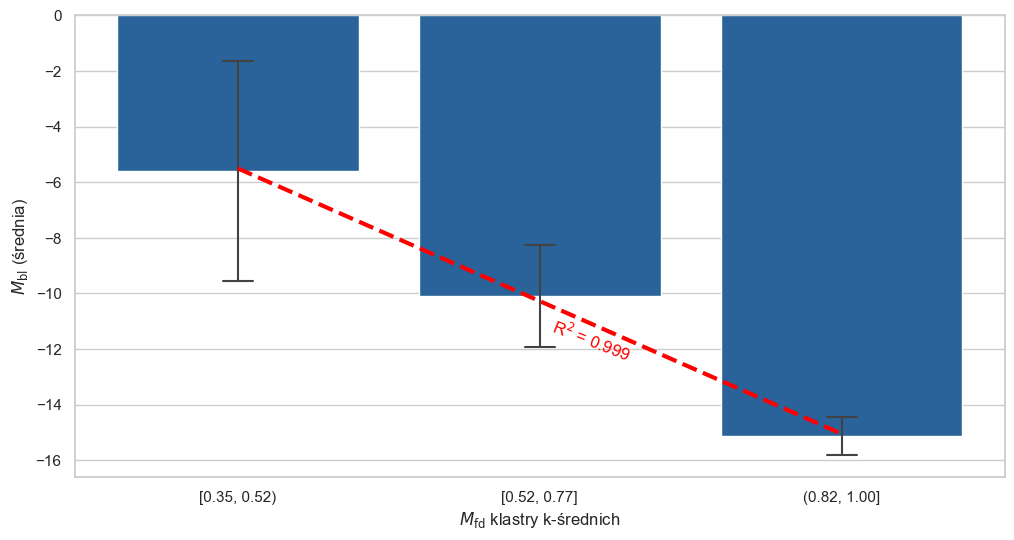

In [15]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cmap = plt.cm.Blues
color = cmap(0.8)

# Wczytaj plik CSV
df = pd.read_csv('benford-fractal.csv')

# Zastosuj metodę DBSCAN
kmeans = KMeans(n_clusters=3, random_state=2147483648)
df['Esthetics_Group'] = kmeans.fit_predict(df[['Fractal']])

# Utwórz histogram
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Esthetics_Group', y='Benford', data=df, errorbar='sd', capsize=0.1, err_kws={'linewidth': 1.5}, color=color)

# Oblicz średnią wartość z kolumny Benford dla każdej grupy
group_means = df.groupby('Esthetics_Group')['Benford'].mean().values

# Oblicz regresję liniową
X = np.arange(len(group_means)).reshape(-1, 1)
regression = LinearRegression().fit(X, group_means)
regression_line = regression.predict(X)

# Oblicz R^2
r2 = r2_score(group_means, regression_line)

# Wyświetl regresję liniową na histogramie
plt.plot(X, regression_line, color='red', linestyle='--', linewidth=3)

# Dodaj etykietę z R^2
plt.text(0.511, 0.35, f'R$^2$ = {r2:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         color='red', rotation=-21.37)

# Dodaj etykiety i tytuły
plt.xlabel('$M_{\mathrm{fd}}$ klastry k-średnich')
plt.ylabel('$M_{\mathrm{bl}}$ (średnia)')

# Pobierz wartości liczbowe (min i max) dla każdego klastra
cluster_ranges = df.groupby('Esthetics_Group')['Fractal'].agg(['min', 'max']).values

# Przygotuj etykiety dla osi X z różnymi rodzajami nawiasów
xtick_labels = [f'[{min_val:.2f}, {max_val:.2f})' if idx == 0 else
                 f'[{min_val:.2f}, {max_val:.2f}]' if idx == 1 else
                 f'({min_val:.2f}, {max_val:.2f}]' for idx, (min_val, max_val) in enumerate(cluster_ranges)]

# Ustaw etykiety na osi X
plt.xticks(ticks=np.unique(df['Esthetics_Group']), labels=xtick_labels)


# Wyświetl wykres
plt.show()
